In [2]:
import pandas as pd

# Загрузка предоставленного файла
file_path = 'income.csv'
data = pd.read_csv(file_path)

# Вывод первых строк датасета для анализа
data.head()


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [3]:
# Выбор целевой переменной (y) и признаков (X)
y = data['hours-per-week']  # Непрерывная целевая переменная
X = data.drop(['hours-per-week', 'income >50K'], axis=1)  # Убираем целевую переменную и метку дохода

# Преобразование категориальных данных в числовые с помощью One-Hot Encoding
category_columns = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=category_columns, drop_first=True)

# Проверка структуры данных после преобразований
X.head()


,age,education-num,capital-gain,capital-loss,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,13,2174,0,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,50,13,0,0,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,38,9,0,0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,7,0,0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,13,0,0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Regularization: None
Mean Absolute Error (MAE): 7.75
Mean Squared Error (MSE): 124.12
R^2 Score: 0.19


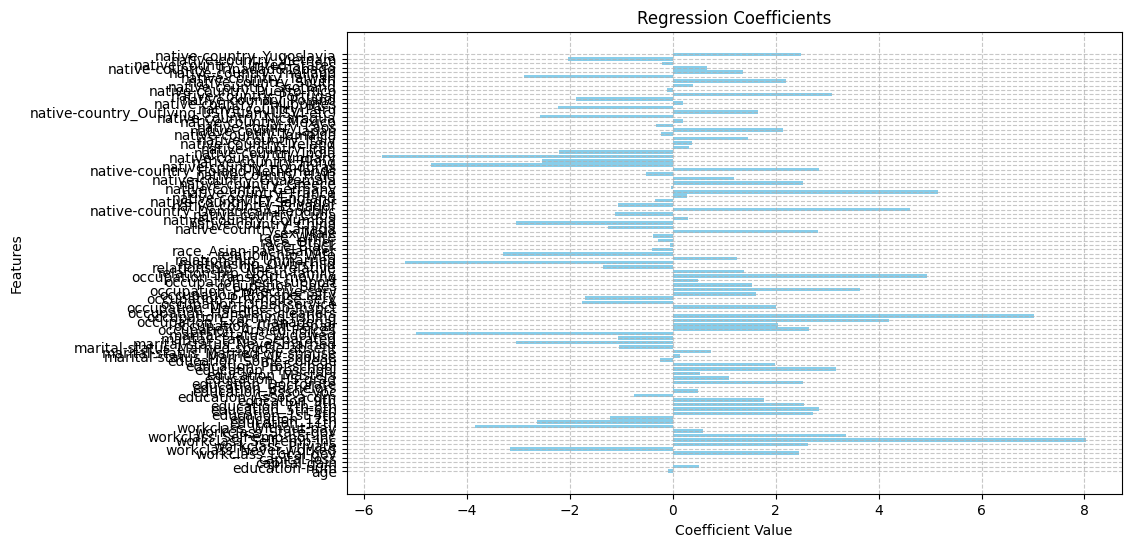

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt



def plot_regression_coefficients(model, feature_names):
    """
    Визуализация коэффициентов регрессии.
    """
    coefficients = model.coef_ if hasattr(model, 'coef_') else None

    if coefficients is not None:
        plt.figure(figsize=(10, 6))
        plt.barh(feature_names, coefficients, color='skyblue')
        plt.xlabel("Coefficient Value")
        plt.ylabel("Features")
        plt.title("Regression Coefficients")
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.show()
    else:
        print("Не визуализируется")

# Функция для выполнения регрессии
def resolve_regression(X, y, regularization=None):
    """
    Выполняет регрессию с учетом регуляризации.
    """
    # Разделение данных на обучающую и тестовую выборки (80% / 20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Инициализация модели в зависимости от типа регуляризации
    if regularization == 'l1':
        model = Lasso()  # L1-регуляризация (Lasso)
    elif regularization == 'l2':
        model = Ridge()  # L2-регуляризация (Ridge)
    else:
        model = LinearRegression()  # Линейная регрессия без регуляризации

    # Обучение модели
    model.fit(X_train, y_train)

    # Предсказание на тестовой выборке
    y_pred = model.predict(X_test)

    # Вычисление метрик качества
    mae = mean_absolute_error(y_test, y_pred)  # Средняя абсолютная ошибка
    mse = mean_squared_error(y_test, y_pred)   # Средняя квадратичная ошибка
    r2 = r2_score(y_test, y_pred)              # Коэффициент детерминации (R^2)

    # Вывод результатов
    print(f"Regularization: {regularization}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")

    return model, X_train, X_test, y_train, y_test

# Выполнение регрессии без регуляризации
model, X_train, X_test, y_train, y_test = resolve_regression(X, y)
plot_regression_coefficients(model, X.columns)


Regularization: None
Mean Absolute Error (MAE): 7.94
Mean Squared Error (MSE): 148.72
R^2 Score: 0.03


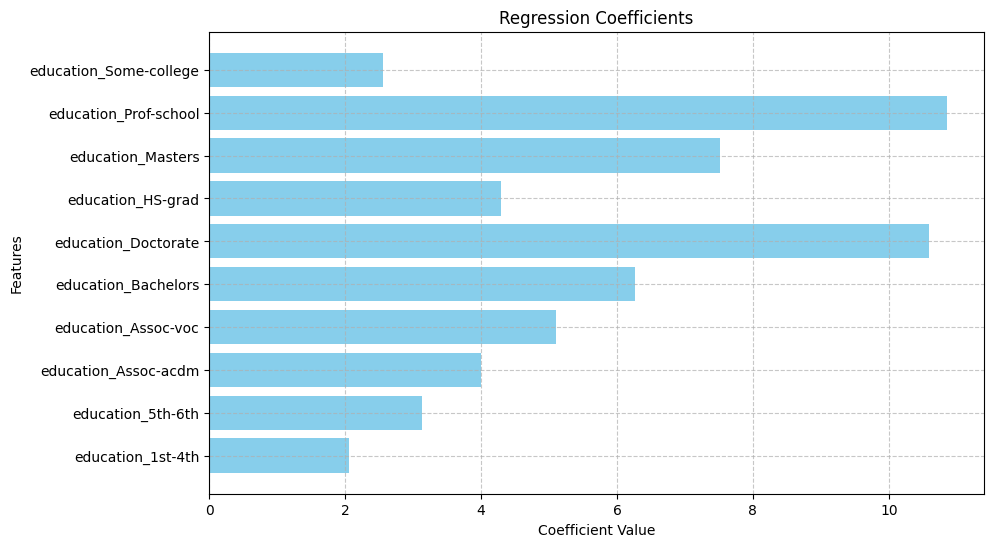

In [5]:
from sklearn.feature_selection import RFE

# Отбор признаков с помощью Recursive Feature Elimination (RFE)
def select_features_rfe(X, y, max_features=10):
    model = LinearRegression()  # Базовая модель для RFE
    selector = RFE(model, n_features_to_select=max_features)
    selector = selector.fit(X, y)
    selected_features = X.columns[selector.support_]
    return X[selected_features], y

# Отбор 10 лучших признаков
X_selected, y_selected = select_features_rfe(X, y, max_features=10)

# Повторная регрессия с отобранными признаками
model_selected, X_train, X_test, y_train, y_test = resolve_regression(X_selected, y_selected)
plot_regression_coefficients(model_selected, X_selected.columns)


Regularization: l1
Mean Absolute Error (MAE): 7.65
Mean Squared Error (MSE): 154.08
R^2 Score: -0.00


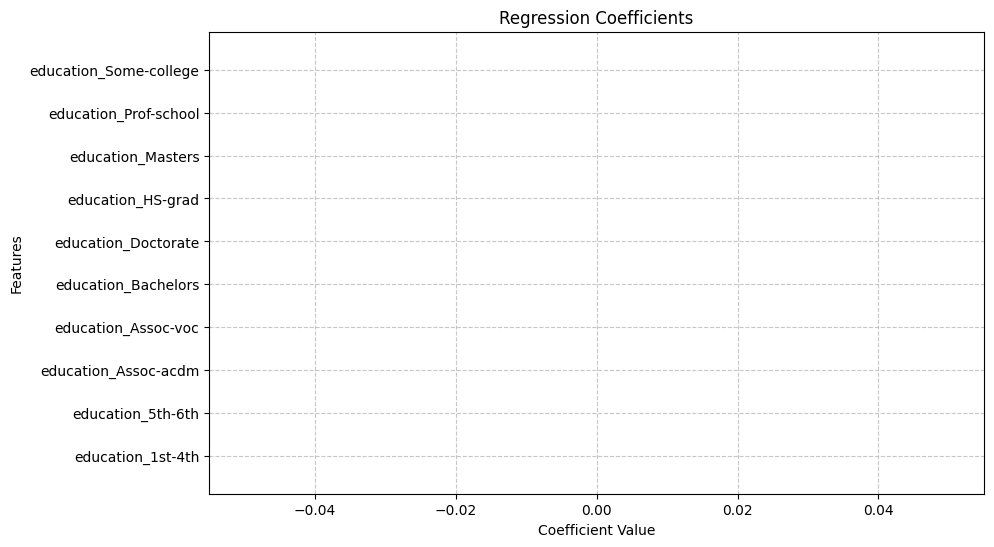

Regularization: l2
Mean Absolute Error (MAE): 7.94
Mean Squared Error (MSE): 148.72
R^2 Score: 0.03


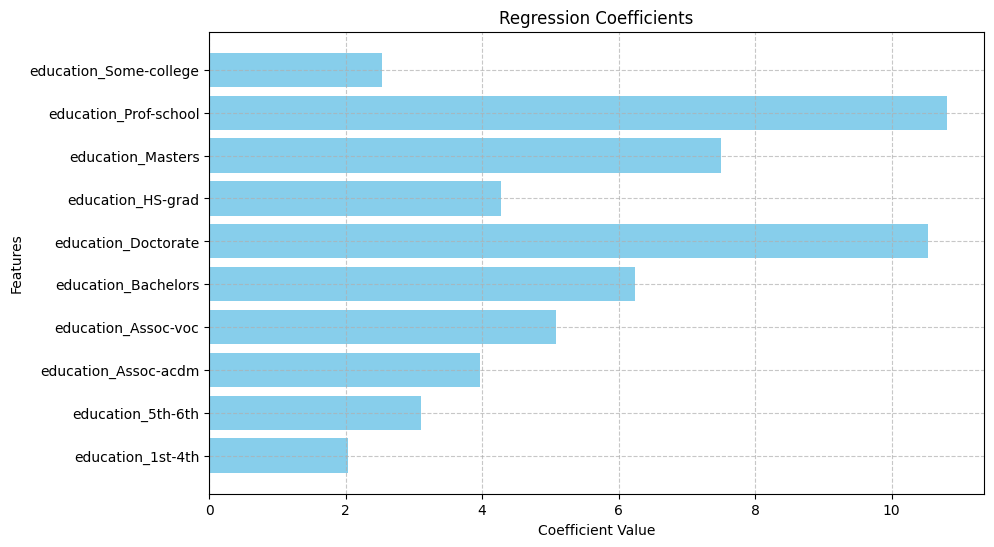

In [6]:
# Регрессия с L1-регуляризацией (Lasso)
model_l1, _, _, _, _ = resolve_regression(X_selected, y_selected, regularization='l1')
plot_regression_coefficients(model_l1, X_selected.columns)


# Регрессия с L2-регуляризацией (Ridge)
model_l2, _, _, _, _ = resolve_regression(X_selected, y_selected, regularization='l2')
plot_regression_coefficients(model_l2, X_selected.columns)


In [7]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Функция для обучения и оценки качества модели
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, r2

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

# Модель KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_mae, knn_mse, knn_r2 = evaluate_model(knn_model, X_train, X_test, y_train, y_test)

# Модель DecisionTreeRegressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_mae, tree_mse, tree_r2 = evaluate_model(tree_model, X_train, X_test, y_train, y_test)

# Вывод результатов
print("KNeighborsRegressor:")
print(f"MAE: {knn_mae:.2f}, MSE: {knn_mse:.2f}, R²: {knn_r2:.2f}\n")
print("DecisionTreeRegressor:")
print(f"MAE: {tree_mae:.2f}, MSE: {tree_mse:.2f}, R²: {tree_r2:.2f}")


KNeighborsRegressor:
MAE: 10.34, MSE: 201.73, R²: -0.31

DecisionTreeRegressor:
MAE: 7.94, MSE: 148.72, R²: 0.03
